In [40]:
% matplotlib inline

In [200]:
import matplotlib.pyplot as plt
import pandas as pd
import scipy as sp
import numpy as np
import os



In [31]:
path = os.path.join('calcs.csv')
df = pd.read_csv(path)
df.head()

,Subject ID,MRI ID,Group,Visit,MR Delay,M/F,Hand,Age,EDUC,EDU_SCALED,SES,MMSE,CDR,eTIV,nWBV,ASF
0,OAS2_0018,OAS2_0018_MR1,Converted,1,0,F,R,87,14,2.882353,1.0,30.0,0.0,1406,0.715,1.248
1,OAS2_0018,OAS2_0018_MR3,Converted,3,489,F,R,88,14,2.882353,1.0,29.0,0.0,1398,0.713,1.255
2,OAS2_0020,OAS2_0020_MR1,Converted,1,0,M,R,80,20,4.294118,1.0,29.0,0.0,1587,0.693,1.106
3,OAS2_0031,OAS2_0031_MR1,Converted,1,0,F,R,86,12,2.411765,3.0,30.0,0.0,1430,0.718,1.227
4,OAS2_0031,OAS2_0031_MR2,Converted,2,446,F,R,88,12,2.411765,3.0,30.0,0.0,1445,0.719,1.215


In [32]:
df.count()
df = df.dropna(how='any')
df.count()

Subject ID    354
MRI ID        354
Group         354
Visit         354
MR Delay      354
M/F           354
Hand          354
Age           354
EDUC          354
EDU_SCALED    354
SES           354
MMSE          354
CDR           354
eTIV          354
nWBV          354
ASF           354
dtype: int64

In [33]:
df.head()
df2 = df.set_index(['Subject ID','MRI ID'])
df2.head()

Group  Visit  MR Delay M/F Hand  Age  EDUC  \
Subject ID MRI ID                                                          
OAS2_0018  OAS2_0018_MR1  Converted      1         0   F    R   87    14   
           OAS2_0018_MR3  Converted      3       489   F    R   88    14   
OAS2_0020  OAS2_0020_MR1  Converted      1         0   M    R   80    20   
OAS2_0031  OAS2_0031_MR1  Converted      1         0   F    R   86    12   
           OAS2_0031_MR2  Converted      2       446   F    R   88    12   

                          EDU_SCALED  SES  MMSE  CDR  eTIV   nWBV    ASF  
Subject ID MRI ID                                                         
OAS2_0018  OAS2_0018_MR1    2.882353  1.0  30.0  0.0  1406  0.715  1.248  
           OAS2_0018_MR3    2.882353  1.0  29.0  0.0  1398  0.713  1.255  
OAS2_0020  OAS2_0020_MR1    4.294118  1.0  29.0  0.0  1587  0.693  1.106  
OAS2_0031  OAS2_0031_MR1    2.411765  3.0  30.0  0.0  1430  0.718  1.227  
           OAS2_0031_MR2    2.411765  3.0  30.0  0.0  1445  0.719  1.215

M/F
F    84
M    58
Name: Subject ID, dtype: int64


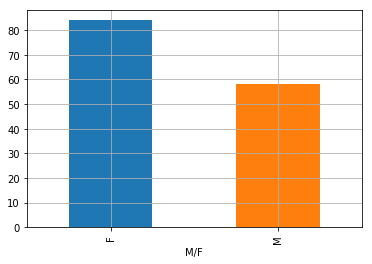

In [6]:
# LOOK OVER THIS; solved
df3 = df.drop_duplicates(['Subject ID']).groupby('M/F').count()['Subject ID']
bar = df3.plot(kind='bar',grid=True)
print(df3)

Group
Converted      14
Demented       56
Nondemented    72
Name: Subject ID, dtype: int64

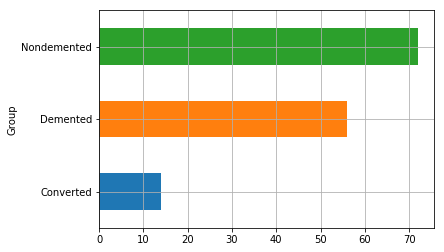

In [7]:
df4 = df.drop_duplicates(['Subject ID'],keep='last').groupby('Group').count()['Subject ID']
bar2 = df4.plot(kind='barh',grid=True)
df4

Group
Demented       70.0
Nondemented    72.0
dtype: float64

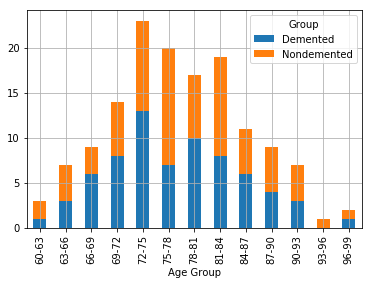

In [8]:
bins = np.arange(60,100,3)
# len(bins) # = 14
groups = [f'{holder}-{bins[i+1]}' for i, holder in enumerate(bins[:-1])]

df['Age Group'] = pd.cut(df['Age'],bins,labels=groups,include_lowest=True)

# if possible, combine converted to demented for this chart
df5 = df.loc[df['Group'] == 'Converted', 'Group'] = 'Demented'

df5 = df.drop_duplicates(['Subject ID'],keep='last').groupby(['Age Group','Group']).count()['Subject ID'].unstack()
df5.head(20)
bar3 = df5.plot(kind='bar',stacked=True,grid=True)
df5.sum()


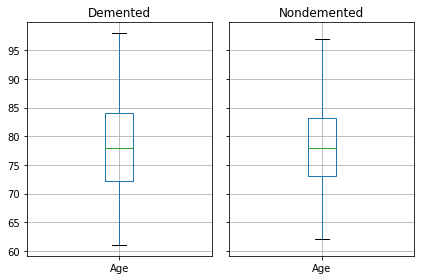

In [9]:
# converted = df.loc
# demented = 
# nondemented = 
# temp = pd.DataFrame({'Converted':})

df6 = df[['Subject ID','Group','Age']].drop_duplicates(['Subject ID'],keep='last').groupby('Group')
df6.head()

# df5 = df.groupby(['Age Group','Group']).count()['Subject ID'].unstack()
box4 = df6.boxplot()
plt.tight_layout()

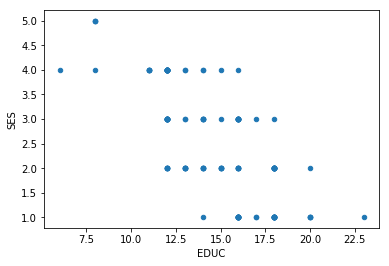

In [10]:
# NO TREND TO FIND, dropped n/a rows
mag = df.drop_duplicates(['Subject ID'],keep='last')[['EDUC','SES']]
mag.plot.scatter(x='EDUC',y='SES')

SES
1.0    33
2.0    42
3.0    34
4.0    30
5.0     3
Name: Subject ID, dtype: int64


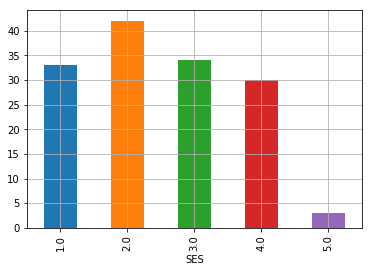

In [11]:
df7 = df.drop_duplicates(['Subject ID']).groupby('SES').count()['Subject ID']
bar5 = df7.plot(kind='bar',grid=True)
# scat = df7.plot.line()
print(df7)

EDUC
6      1
8      4
11     5
12    36
13    10
14    13
15     7
16    31
17     3
18    26
20     5
23     1
Name: Subject ID, dtype: int64


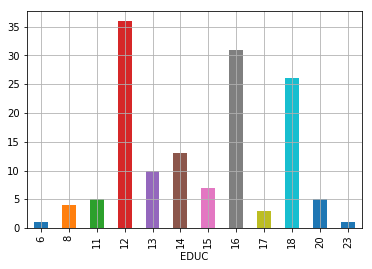

In [12]:
# bins = np.arange(1,6,1)
# len(bins) # = 14
# groups = [f'{holder}-{bins[i+1]}' for i, holder in enumerate(bins[:-1])]
# groups
# df['Age Group'] = pd.cut(df['Age'],bins,labels=groups,include_lowest=True)

df7 = df.drop_duplicates(['Subject ID']).groupby('EDUC').count()['Subject ID']
bar6 = df7.plot(kind='bar',grid=True)
print(df7)

In [13]:
df2.head()

Group  Visit  MR Delay M/F Hand  Age  EDUC  \
Subject ID MRI ID                                                          
OAS2_0018  OAS2_0018_MR1  Converted      1         0   F    R   87    14   
           OAS2_0018_MR3  Converted      3       489   F    R   88    14   
OAS2_0020  OAS2_0020_MR1  Converted      1         0   M    R   80    20   
OAS2_0031  OAS2_0031_MR1  Converted      1         0   F    R   86    12   
           OAS2_0031_MR2  Converted      2       446   F    R   88    12   

                          EDU_SCALED  SES  MMSE  CDR  eTIV   nWBV    ASF  
Subject ID MRI ID                                                         
OAS2_0018  OAS2_0018_MR1    2.882353  1.0  30.0  0.0  1406  0.715  1.248  
           OAS2_0018_MR3    2.882353  1.0  29.0  0.0  1398  0.713  1.255  
OAS2_0020  OAS2_0020_MR1    4.294118  1.0  29.0  0.0  1587  0.693  1.106  
OAS2_0031  OAS2_0031_MR1    2.411765  3.0  30.0  0.0  1430  0.718  1.227  
           OAS2_0031_MR2    2.411765  3.0  30.0  0.0  1445  0.719  1.215

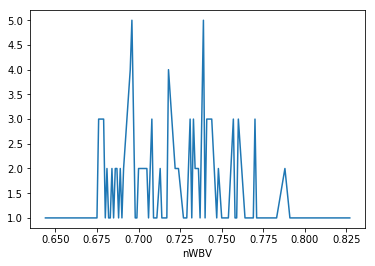

In [14]:
df8 = df.drop_duplicates(['Subject ID'],keep='last').groupby('nWBV').count()['Subject ID']
# bar7 = df8.plot(kind='bar',grid=True)
df8.plot.line()

In [15]:
# PUT THIS IN BINS
bins = np.arange(60,100,3)
# len(bins) # = 14
# groups = [f'{holder}-{bins[i+1]}' for i, holder in enumerate(bins[:-1])]

# df['Age Group'] = pd.cut(df['Age'],bins,labels=groups,include_lowest=True)

# df9 = df.drop_duplicates(['Subject ID'],keep='last').groupby('eTIV').count()['Subject ID']
# bar8 = df9.plot(kind='bar',grid=True)

In [16]:
# df.drop_duplicates(['Subject ID'],keep='first')['CDR'].value_counts()
df.drop_duplicates(['Subject ID'],keep='last')['CDR'].value_counts()
# df.drop_duplicates(['Subject ID'],keep='last')['Group'].value_counts()

0.0    70
0.5    50
1.0    19
2.0     3
Name: CDR, dtype: int64

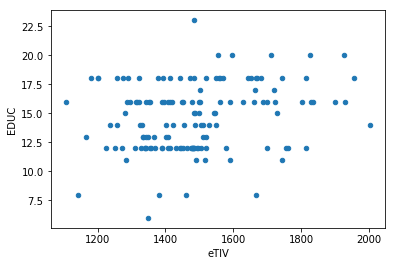

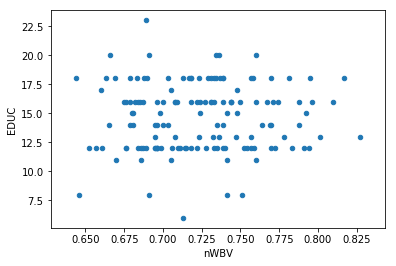

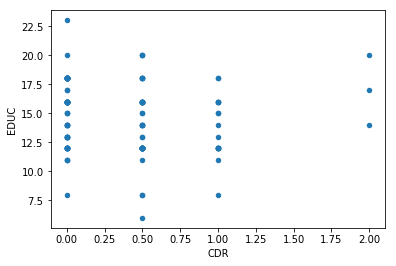

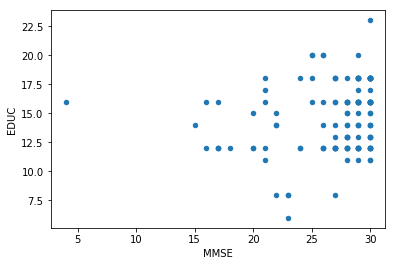

In [17]:
# NO TREND TO FIND, dropped n/a rows
mag = df.drop_duplicates(['Subject ID'],keep='last')[['eTIV','EDUC']]
mag.plot.scatter(x='eTIV',y='EDUC')

mag = df.drop_duplicates(['Subject ID'],keep='last')[['nWBV','EDUC']]
mag.plot.scatter(x='nWBV',y='EDUC')

mag = df.drop_duplicates(['Subject ID'],keep='last')[['CDR','EDUC']]
mag.plot.scatter(x='CDR',y='EDUC')

mag = df.drop_duplicates(['Subject ID'],keep='last')[['MMSE','EDUC']]
mag.plot.scatter(x='MMSE',y='EDUC')

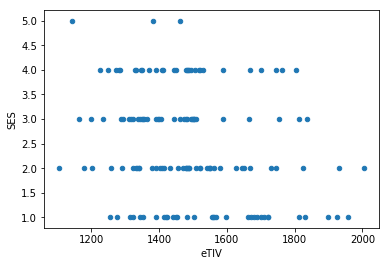

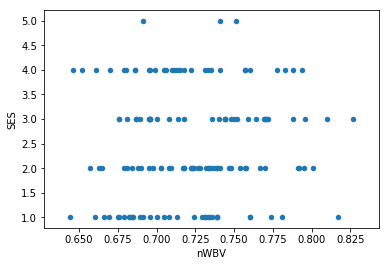

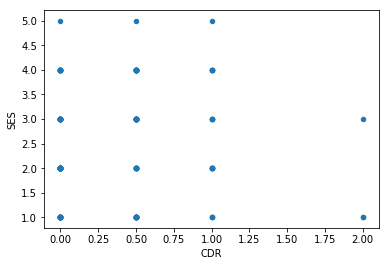

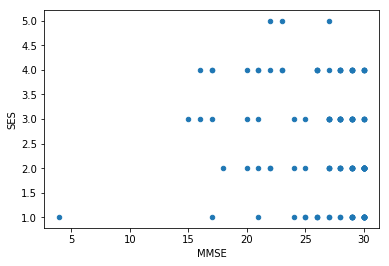

In [18]:
# NO TREND TO FIND, dropped n/a rows
mag = df.drop_duplicates(['Subject ID'],keep='last')[['eTIV','SES']]
mag.plot.scatter(x='eTIV',y='SES')

mag = df.drop_duplicates(['Subject ID'],keep='last')[['nWBV','SES']]
mag.plot.scatter(x='nWBV',y='SES')

mag = df.drop_duplicates(['Subject ID'],keep='last')[['CDR','SES']]
mag.plot.scatter(x='CDR',y='SES')

mag = df.drop_duplicates(['Subject ID'],keep='last')[['MMSE','SES']]
mag.plot.scatter(x='MMSE',y='SES')

The difference in sample means is significant.
p-value: 1.1179431328730806e-20


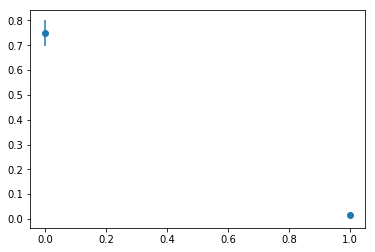

In [203]:
# t test between demented and non demented
m1 = df.drop_duplicates(['Subject ID'],keep='last').loc[df['Group'] == 'Demented']['CDR'].mean()
m2 = df.drop_duplicates(['Subject ID'],keep='last').loc[df['Group'] == 'Nondemented']['CDR'].mean()

s1 = df.drop_duplicates(['Subject ID'],keep='last').loc[df['Group'] == 'Demented']['CDR'].sem()
s2 = df.drop_duplicates(['Subject ID'],keep='last').loc[df['Group'] == 'Nondemented']['CDR'].sem()

means = [m1,m2]
x_axis = np.arange(0, len(means))
sems = [s1,s2]

fig, ax = plt.subplots()
ax.errorbar(x_axis, means, yerr=sems, fmt="o")

pop1 = df.drop_duplicates(['Subject ID'],keep='last').loc[df['Group'] == 'Demented']['CDR']
pop2 = df.drop_duplicates(['Subject ID'],keep='last').loc[df['Group'] == 'Nondemented']['CDR']

(t_stat, p) = sp.stats.ttest_ind(pop1, pop2, equal_var=False)

if p < 0.05:
    print("The difference in sample means is significant.")
else:
    print("The difference in sample means is not significant.")
    
print(f'p-value: {p}')

The difference in sample means is significant.
p-value: 6.368662877427826e-11


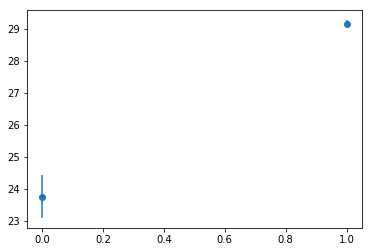

In [202]:
# t test between demented and non demented
m1 = df.drop_duplicates(['Subject ID'],keep='last').loc[df['Group'] == 'Demented']['MMSE'].mean()
m2 = df.drop_duplicates(['Subject ID'],keep='last').loc[df['Group'] == 'Nondemented']['MMSE'].mean()

s1 = df.drop_duplicates(['Subject ID'],keep='last').loc[df['Group'] == 'Demented']['MMSE'].sem()
s2 = df.drop_duplicates(['Subject ID'],keep='last').loc[df['Group'] == 'Nondemented']['MMSE'].sem()

means = [m1,m2]
x_axis = np.arange(0, len(means))
sems = [s1,s2]

fig, ax = plt.subplots()
ax.errorbar(x_axis, means, yerr=sems, fmt="o")

pop1 = df.drop_duplicates(['Subject ID'],keep='last').loc[df['Group'] == 'Demented']['MMSE']
pop2 = df.drop_duplicates(['Subject ID'],keep='last').loc[df['Group'] == 'Nondemented']['MMSE']

(t_stat, p) = sp.stats.ttest_ind(pop1, pop2, equal_var=False)

if p < 0.05:
    print("The difference in sample means is significant.")
else:
    print("The difference in sample means is not significant.")
    
print(f'p-value: {p}')

The difference in sample means is significant.
p-value: 0.030094038248275973


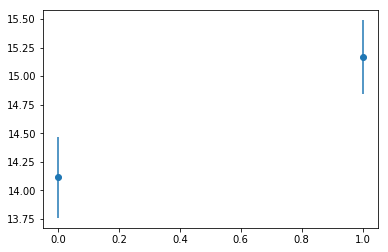

In [20]:
# t test between demented and non demented
m1 = df.drop_duplicates(['Subject ID'],keep='last').loc[df['Group'] == 'Demented']['EDUC'].mean()
m2 = df.drop_duplicates(['Subject ID'],keep='last').loc[df['Group'] == 'Nondemented']['EDUC'].mean()

s1 = df.drop_duplicates(['Subject ID'],keep='last').loc[df['Group'] == 'Demented']['EDUC'].sem()
s2 = df.drop_duplicates(['Subject ID'],keep='last').loc[df['Group'] == 'Nondemented']['EDUC'].sem()

means = [m1,m2]
x_axis = np.arange(0, len(means))
sems = [s1,s2]

fig, ax = plt.subplots()
ax.errorbar(x_axis, means, yerr=sems, fmt="o")

pop1 = df.drop_duplicates(['Subject ID'],keep='last').loc[df['Group'] == 'Demented']['EDUC']
pop2 = df.drop_duplicates(['Subject ID'],keep='last').loc[df['Group'] == 'Nondemented']['EDUC']

(t_stat, p) = stats.ttest_ind(pop1, pop2, equal_var=False)

if p < 0.05:
    print("The difference in sample means is significant.")
else:
    print("The difference in sample means is not significant.")
    
print(f'p-value: {p}')

The difference in sample means is not significant.
p-value: 0.41661219052905774


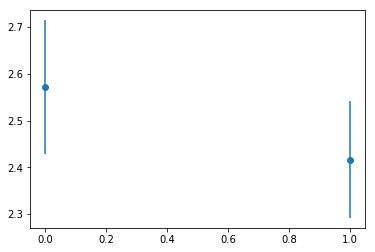

In [21]:
# t test between demented and non demented
m1 = df.drop_duplicates(['Subject ID'],keep='last').loc[df['Group'] == 'Demented']['SES'].mean()
m2 = df.drop_duplicates(['Subject ID'],keep='last').loc[df['Group'] == 'Nondemented']['SES'].mean()

s1 = df.drop_duplicates(['Subject ID'],keep='last').loc[df['Group'] == 'Demented']['SES'].sem()
s2 = df.drop_duplicates(['Subject ID'],keep='last').loc[df['Group'] == 'Nondemented']['SES'].sem()

means = [m1,m2]
x_axis = np.arange(0, len(means))
sems = [s1,s2]

fig, ax = plt.subplots()
ax.errorbar(x_axis, means, yerr=sems, fmt="o")

pop1 = df.drop_duplicates(['Subject ID'],keep='last').loc[df['Group'] == 'Demented']['SES']
pop2 = df.drop_duplicates(['Subject ID'],keep='last').loc[df['Group'] == 'Nondemented']['SES']

(t_stat, p) = stats.ttest_ind(pop1, pop2, equal_var=False)

if p < 0.05:
    print("The difference in sample means is significant.")
else:
    print("The difference in sample means is not significant.")
    
print(f'p-value: {p}')

The difference in sample means is not significant.
p-value: 0.8954213416211908


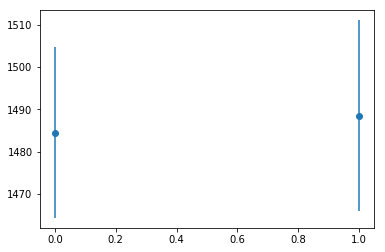

In [22]:
# t test between demented and non demented
m1 = df.drop_duplicates(['Subject ID'],keep='last').loc[df['Group'] == 'Demented']['eTIV'].mean()
m2 = df.drop_duplicates(['Subject ID'],keep='last').loc[df['Group'] == 'Nondemented']['eTIV'].mean()

s1 = df.drop_duplicates(['Subject ID'],keep='last').loc[df['Group'] == 'Demented']['eTIV'].sem()
s2 = df.drop_duplicates(['Subject ID'],keep='last').loc[df['Group'] == 'Nondemented']['eTIV'].sem()

means = [m1,m2]
x_axis = np.arange(0, len(means))
sems = [s1,s2]

fig, ax = plt.subplots()
ax.errorbar(x_axis, means, yerr=sems, fmt="o")

pop1 = df.drop_duplicates(['Subject ID'],keep='last').loc[df['Group'] == 'Demented']['eTIV']
pop2 = df.drop_duplicates(['Subject ID'],keep='last').loc[df['Group'] == 'Nondemented']['eTIV']

(t_stat, p) = stats.ttest_ind(pop1, pop2, equal_var=False)

if p < 0.05:
    print("The difference in sample means is significant.")
else:
    print("The difference in sample means is not significant.")
    
print(f'p-value: {p}')

The difference in sample means is significant.
p-value: 0.00032065145779558435


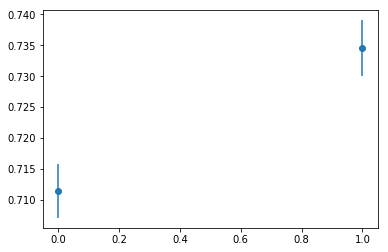

In [23]:
# t test between demented and non demented
m1 = df.drop_duplicates(['Subject ID'],keep='last').loc[df['Group'] == 'Demented']['nWBV'].mean()
m2 = df.drop_duplicates(['Subject ID'],keep='last').loc[df['Group'] == 'Nondemented']['nWBV'].mean()

s1 = df.drop_duplicates(['Subject ID'],keep='last').loc[df['Group'] == 'Demented']['nWBV'].sem()
s2 = df.drop_duplicates(['Subject ID'],keep='last').loc[df['Group'] == 'Nondemented']['nWBV'].sem()

means = [m1,m2]
x_axis = np.arange(0, len(means))
sems = [s1,s2]

fig, ax = plt.subplots()
ax.errorbar(x_axis, means, yerr=sems, fmt="o")

pop1 = df.drop_duplicates(['Subject ID'],keep='last').loc[df['Group'] == 'Demented']['nWBV']
pop2 = df.drop_duplicates(['Subject ID'],keep='last').loc[df['Group'] == 'Nondemented']['nWBV']

(t_stat, p) = stats.ttest_ind(pop1, pop2, equal_var=False)

if p < 0.05:
    print("The difference in sample means is significant.")
else:
    print("The difference in sample means is not significant.")
    
print(f'p-value: {p}')

The difference in sample means is significant.
p-value: 0.02420216655520744


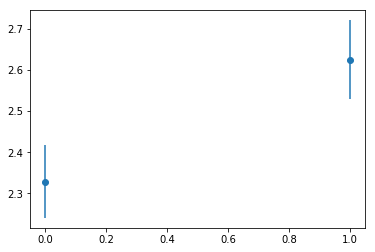

In [24]:
# t test between demented and non demented
m1 = df.drop_duplicates(['Subject ID'],keep='last').loc[df['Group'] == 'Demented']['Visit'].mean()
m2 = df.drop_duplicates(['Subject ID'],keep='last').loc[df['Group'] == 'Nondemented']['Visit'].mean()

s1 = df.drop_duplicates(['Subject ID'],keep='last').loc[df['Group'] == 'Demented']['Visit'].sem()
s2 = df.drop_duplicates(['Subject ID'],keep='last').loc[df['Group'] == 'Nondemented']['Visit'].sem()

means = [m1,m2]
x_axis = np.arange(0, len(means))
sems = [s1,s2]

fig, ax = plt.subplots()
ax.errorbar(x_axis, means, yerr=sems, fmt="o")

pop1 = df.drop_duplicates(['Subject ID'],keep='last').loc[df['Group'] == 'Demented']['Visit']
pop2 = df.drop_duplicates(['Subject ID'],keep='last').loc[df['Group'] == 'Nondemented']['Visit']

(t_stat, p) = stats.ttest_ind(pop1, pop2, equal_var=False)

if p < 0.05:
    print("The difference in sample means is significant.")
else:
    print("The difference in sample means is not significant.")
    
print(f'p-value: {p}')

In [25]:
# CHANGE TO CDR, eTIV, nWBV, EDUC, SES
# not significant: SES, eTIV
# significant: MMSE, CDR, nWBV
# 
# interestingly, # of visits is significant with nondemented having more visits

In [207]:
# temp = pd.DataFrame(np.random.randn(1000, 4), columns=['A','B','C','D'])
# pd.plotting.scatter_matrix(df, alpha=0.2)

In [205]:
df.head()

,Subject ID,MRI ID,Group,Visit,MR Delay,M/F,Hand,Age,EDUC,EDU_SCALED,SES,MMSE,CDR,eTIV,nWBV,ASF,MMSE group
0,OAS2_0018,OAS2_0018_MR1,Converted,1,0,F,R,87,14,2.882353,1.0,30.0,0.0,1406,0.715,1.248,30
1,OAS2_0018,OAS2_0018_MR3,Converted,3,489,F,R,88,14,2.882353,1.0,29.0,0.0,1398,0.713,1.255,26-29
2,OAS2_0020,OAS2_0020_MR1,Converted,1,0,0,R,80,20,4.294118,1.0,29.0,0.0,1587,0.693,1.106,26-29
3,OAS2_0031,OAS2_0031_MR1,Converted,1,0,F,R,86,12,2.411765,3.0,30.0,0.0,1430,0.718,1.227,30
4,OAS2_0031,OAS2_0031_MR2,Converted,2,446,F,R,88,12,2.411765,3.0,30.0,0.0,1445,0.719,1.215,30


In [54]:
cr_abs

,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV
Age,1.000000,0.023026,0.041765,0.063703,0.028736,0.018729,0.520966
EDUC,0.023026,1.000000,0.725770,0.196523,0.113696,0.232042,0.029553
SES,0.041765,0.725770,1.000000,0.165343,0.034501,0.247271,0.061297
MMSE,0.063703,0.196523,0.165343,1.000000,0.683496,0.013221,0.355528
CDR,0.028736,0.113696,0.034501,0.683496,1.000000,0.078973,0.311423
eTIV,0.018729,0.232042,0.247271,0.013221,0.078973,1.000000,0.213791
nWBV,0.520966,0.029553,0.061297,0.355528,0.311423,0.213791,1.000000


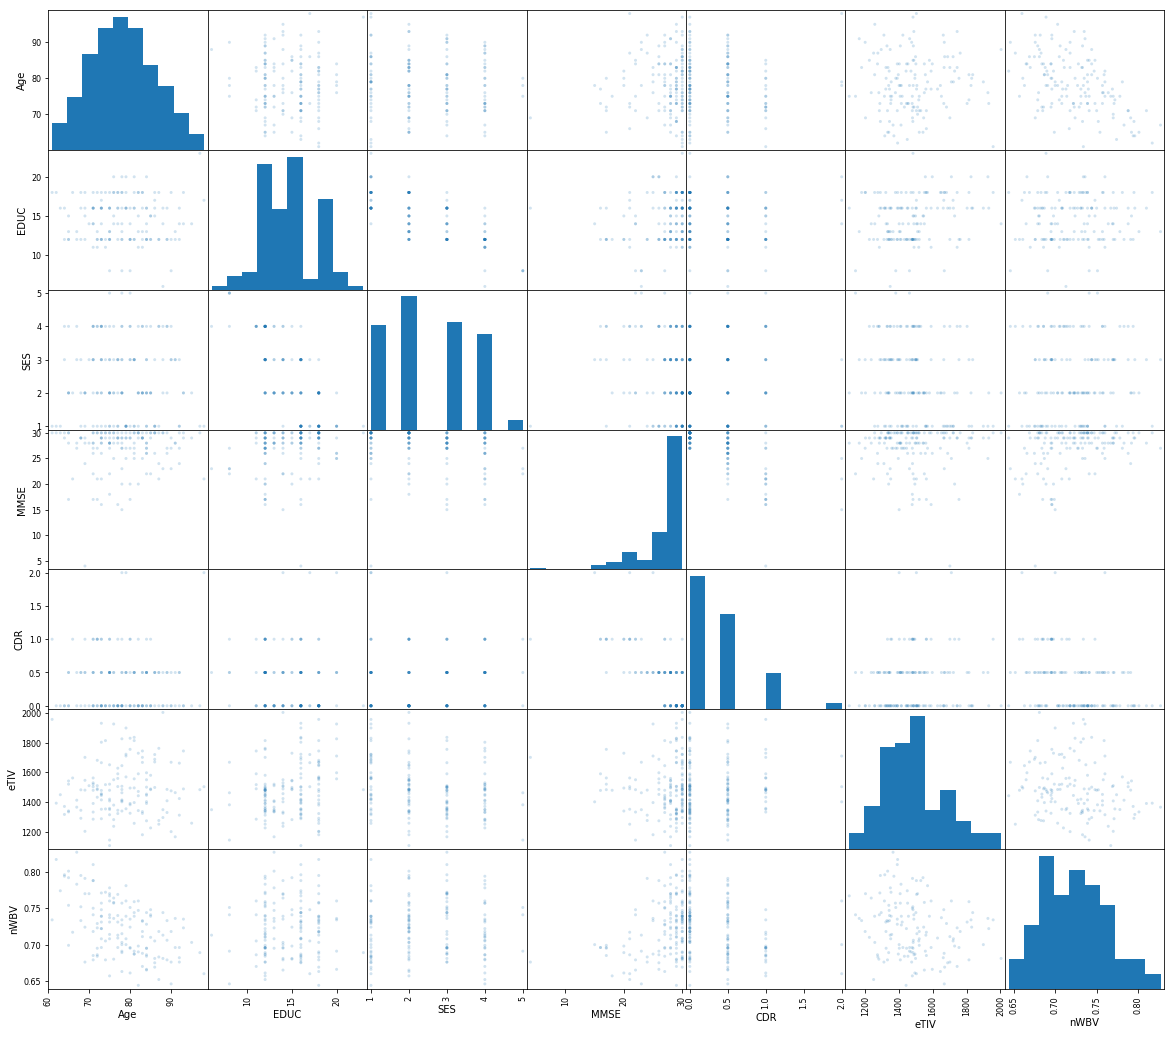

In [146]:
temp = df.drop_duplicates(['Subject ID'],keep='last')[['Group','M/F','Age','EDUC','SES','MMSE','CDR','eTIV','nWBV']]

temp['M/F'] = temp['M/F'].replace(['M','F'], [0,1])
temp['Group'] = temp['Group'].replace(['Converted'],['Demented']).replace(['Nondemented','Demented'], [0,1])

temp
t = pd.plotting.scatter_matrix(temp[['Age','EDUC','SES','MMSE','CDR','eTIV','nWBV']], alpha=0.2,figsize=(20,18),grid=True)
cr = temp.corr()
cr_abs = cr.abs()
# cr_abs.loc[cr_abs['Age'] > 0.7,:]
plt.savefig('matrix.png')

(array([-2.,  0.,  2.,  4.,  6.,  8., 10.]),
 <a list of 7 Text xticklabel objects>)

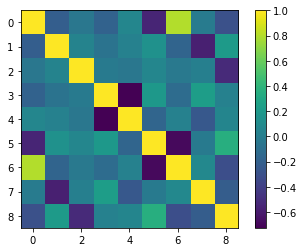

In [136]:
plt.imshow(cr)
plt.colorbar()
plt.xticks()

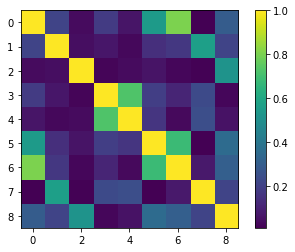

In [126]:
plt.imshow(cr_abs)
plt.colorbar()

In [157]:
# useless, still can't find the 51 patients
df.loc[df['MMSE'] <= 24].count()

Subject ID    52
MRI ID        52
Group         52
Visit         52
MR Delay      52
M/F           52
Hand          52
Age           52
EDUC          52
EDU_SCALED    52
SES           52
MMSE          52
CDR           52
eTIV          52
nWBV          52
ASF           52
dtype: int64

In [133]:
# pie chart for mmse ranges, 30 negative
# 26-29 questionable, 21-25 mild, 11-20 moderate, 1-10 severe

142

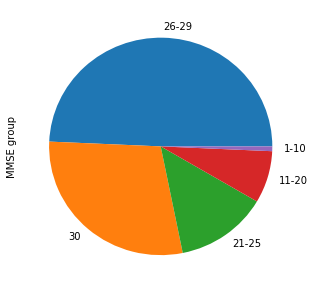

In [199]:
bins = [0,10,20,25,29,30]
# len(bins) # = 7

# fix group names
groups = [f'{holder+1}-{bins[i+1]}' for i, holder in enumerate(bins[:-1])]
groups[4] = '30'
groups

df['MMSE group'] = pd.cut(df['MMSE'],bins,labels=groups,include_lowest=False)
df.drop_duplicates(['Subject ID'],keep='last')['MMSE group'].value_counts().plot.pie(y='MMSE group', figsize=(5, 5))

df.drop_duplicates(['Subject ID'],keep='last')['MMSE group'].count()